"Sales Analysis Case Study" on 12 month sales data

In [78]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import combinations
from collections import Counter

# Visualization setup
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [79]:
#Loading and Concatenating Monthly Data
files = [file for file in os.listdir("data/raw") if file.endswith('.csv')]
all_months_data = pd.concat([pd.read_csv(f"data/raw/{file}") for file in files])

In [80]:
#Cleaning the Data
all_months_data.dropna(how='all', inplace=True)
all_months_data = all_months_data[~all_months_data['Order Date'].str.startswith('Or')]

In [81]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [82]:
# Converting columns to correct types
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

C:\Users\srmpc\AppData\Local\Temp\ipykernel_20376\2797635313.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])


In [83]:
#Feature Engineering
all_months_data['Month'] = all_months_data['Order Date'].dt.month
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{x.split(',')[1]} ({x.split(',')[2].split(' ')[1]})")
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

1. Best Month for Sales

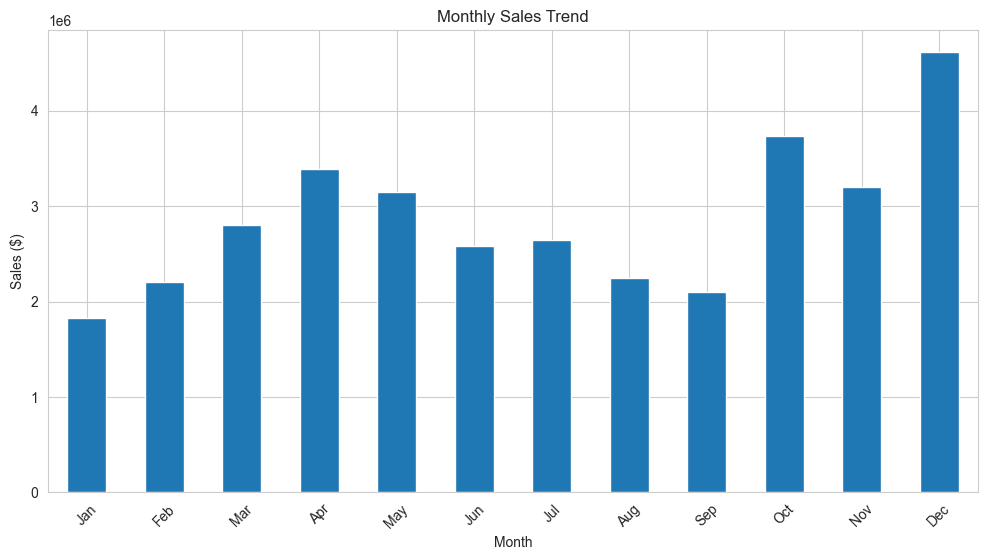

In [ ]:
monthly_sales = all_months_data.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.show()

2. City with Highest Sales

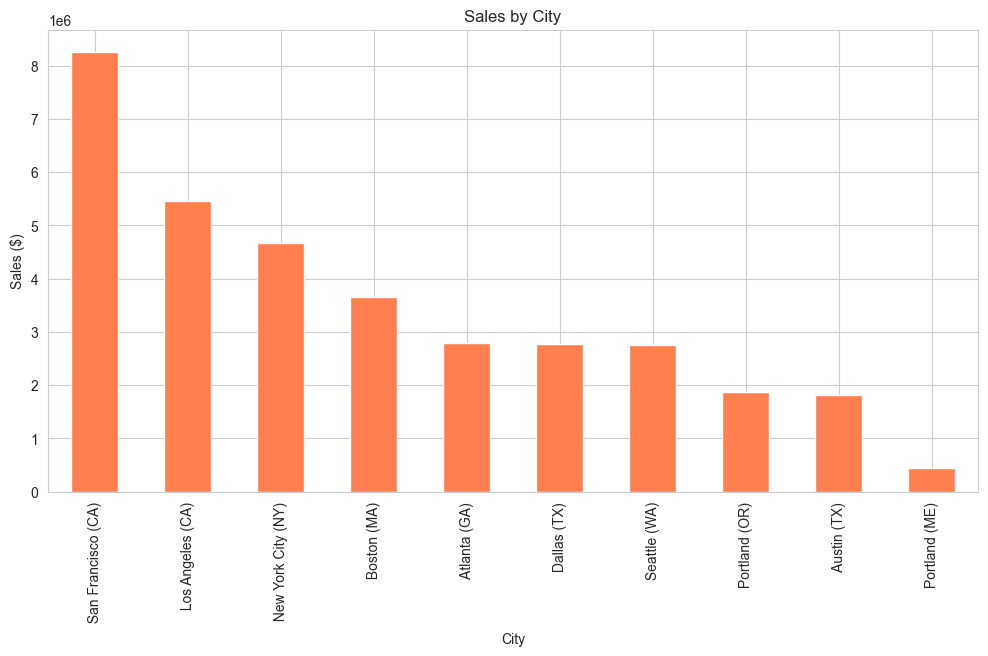

In [ ]:
city_sales = all_months_data.groupby('City')['Sales'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', color='coral', title='Sales by City')
plt.ylabel('Sales ($)')
plt.show()

3. Optimal Ad Time

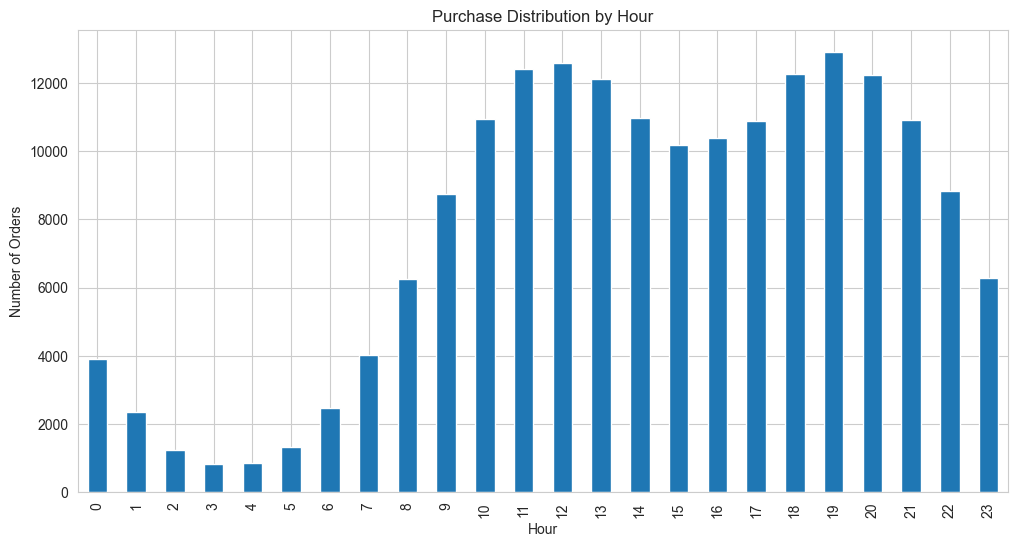

In [86]:
hours = all_months_data['Hour'].value_counts().sort_index()
hours.plot(kind='bar', title='Purchase Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

4. Products Sold Together

In [87]:
dupes = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]
dupes['Grouped'] = dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dupes = dupes[['Order ID', 'Grouped']].drop_duplicates()

count = Counter()
for row in dupes['Grouped']:
    items = row.split(',')
    count.update(Counter(combinations(items, 2)))

print("\nMost common product combinations:")
for combo, freq in count.most_common(10):
    print(combo, freq)



Most common product combinations:
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\srmpc\AppData\Local\Temp\ipykernel_20376\2647194768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupes['Grouped'] = dupes.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


5. Top-Selling Product

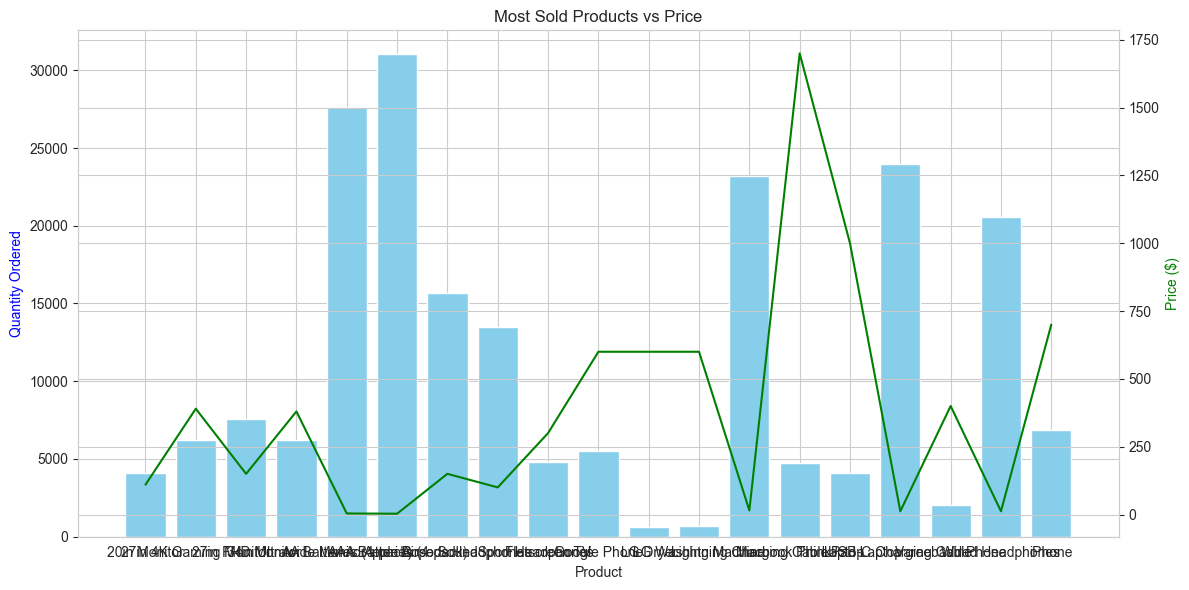

In [88]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()
prices = product_group['Price Each'].mean()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(quantity_ordered.index, quantity_ordered, color='skyblue')
ax2.plot(prices.index, prices, color='green')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='blue')
ax2.set_ylabel('Price ($)', color='green')
plt.xticks(rotation='vertical')
plt.title('Most Sold Products vs Price')
plt.tight_layout()
plt.show()

 Summary & Recommendations:
#  - Best month: December
#  - Best city: San Francisco
#  - Best ad time: 11 AM and 7 PM
#  - Most bundled products: iPhone + Lightning Cable
#  - Most sold: USB-C Charging Cable (low price & high utility)

In [ ]:
all_months_data.to_csv("data/final_all_data.csv", index=False)
#I have include a Readme file for this project to share some extra content about this analysis case study